In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   S4248SM144NCEN  325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [3]:
df.columns=["Sales"]
df.head()
df.shape

(325, 1)

<Axes: xlabel='DATE'>

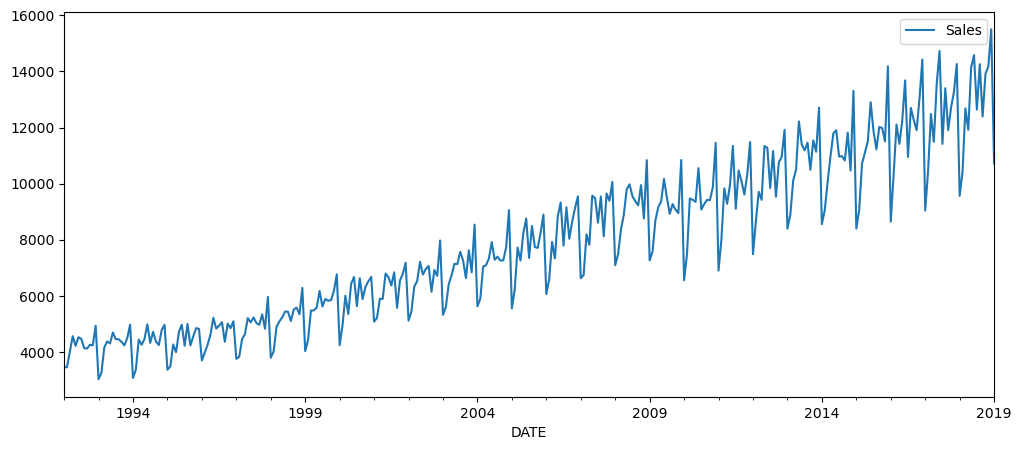

In [4]:
df.plot(figsize=(12,5))

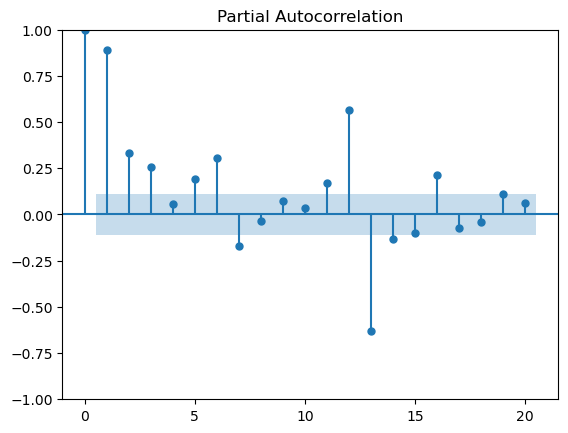

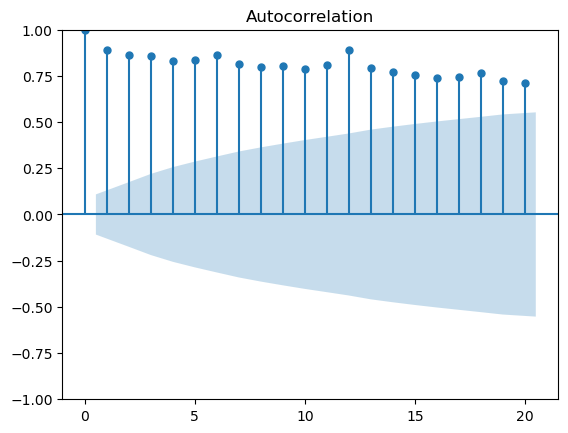

In [5]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.ar_model import AutoReg
pacf=plot_pacf(df,lags=20)
acf=plot_acf(df,lags=20)

In [6]:
df['sales -1']=df['Sales'].shift(1)
df['sales -2']=df['Sales'].shift(2)
df['sales -3']=df['Sales'].shift(3)
df['sales -4']=df['Sales'].shift(4)
df['sales -6']=df['Sales'].shift(6)
df['sales -7']=df['Sales'].shift(7)
df.head()

,Sales,sales -1,sales -2,sales -3,sales -4,sales -6,sales -7
DATE,,,,,,,
1992-01-01,3459,NaN,NaN,NaN,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN,NaN,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN,NaN,NaN,NaN
1992-04-01,4564,4002.0,3458.0,3459.0,NaN,NaN,NaN
1992-05-01,4221,4564.0,4002.0,3458.0,3459.0,NaN,NaN


In [7]:
df.dropna(inplace=True)
df.shape

(318, 7)

In [8]:
x1=df['sales -1']
x2=df['sales -2']
x3=df['sales -3']
x4=df['sales -4']
x5=df['sales -6']
x6=df['sales -7']
y=df['Sales']
x1=x1.values.reshape(-1,1)
x2=x2.values.reshape(-1,1)
x3=x3.values.reshape(-1,1)
x4=x4.values.reshape(-1,1)
x5=x5.values.reshape(-1,1)
x6=x6.values.reshape(-1,1)
x=np.concatenate((x1,x2,x3,x4,x5,x6),axis=1)
print(x)

[[ 4466.  4529.  4221.  4564.  3458.  3459.]
 [ 4137.  4466.  4529.  4221.  4002.  3458.]
 [ 4126.  4137.  4466.  4529.  4564.  4002.]
 ...
 [13914. 12396. 14257. 12640. 14138. 11919.]
 [14174. 13914. 12396. 14257. 14583. 14138.]
 [15504. 14174. 13914. 12396. 12640. 14583.]]


In [9]:
train_x,train_y,test_x,test_y=x[:-30],y[:-30],x[-30:],y[-30:]
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(288, 6) (288,) (30, 6) (30,)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
reg_model=LinearRegression()
forest_model=RandomForestRegressor(n_estimators=100,random_state=1)
reg_model.fit(train_x,train_y)
forest_model.fit(train_x,train_y)

RandomForestRegressor(random_state=1)

In [11]:
lr_pred=reg_model.predict(test_x)
rf_pred=forest_model.predict(test_x)

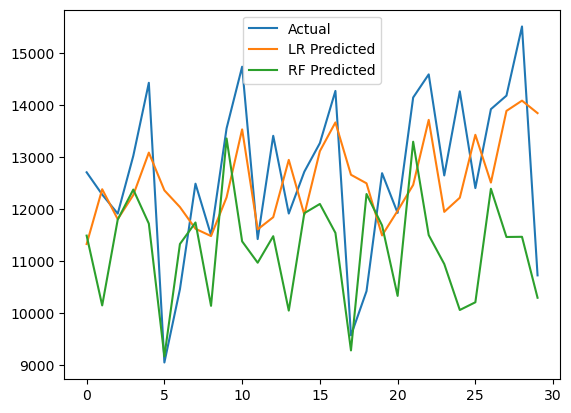

In [12]:
plt.plot(test_y.values,label='Actual')
plt.plot(lr_pred,label='LR Predicted')
plt.plot(rf_pred,label='RF Predicted')

plt.legend()

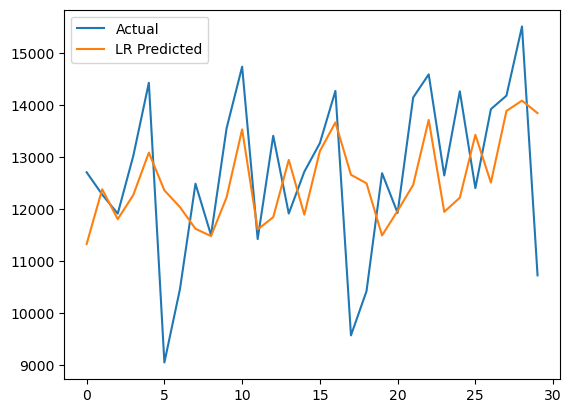

In [13]:
plt.plot(test_y.values,label='Actual')
plt.plot(lr_pred,label='LR Predicted')
plt.legend()

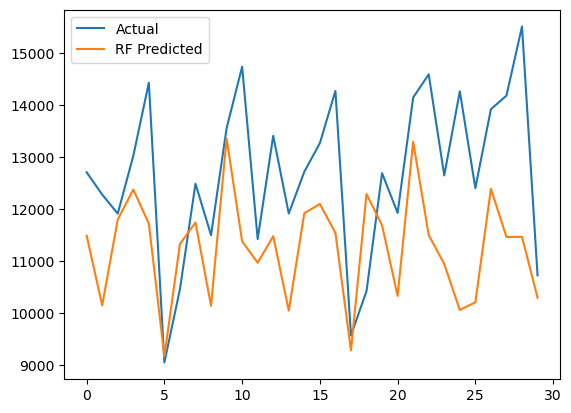

In [14]:
plt.plot(test_y.values,label='Actual')
plt.plot(rf_pred,label='RF Predicted')
plt.legend()

In [15]:
from math import sqrt
from sklearn.metrics import mean_squared_error
lr_rmse=sqrt(mean_squared_error(test_y,lr_pred))
rf_rmse=sqrt(mean_squared_error(test_y,rf_pred))
print(lr_rmse,rf_rmse)

1469.271642572556 1951.3317262474875
